# Telecom Customer Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes, ou seja, quantos deles deixam de comprar ou usar os seus produtos ou serviços em um determinado período. Este problema afeta diretamente a receita e o crescimento das organizações, pois representa a perda de clientes e de oportunidades de venda. Além disso, também impacta na satisfação e na fidelização dos consumidores, que são essenciais para a construção de uma marca forte e de confiança.

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

Com base nessa informação o meu **objetivo** nesse projeto é que o modelo de Machine Learning apresente a melhor taxa de **True Positives** que são os clientes que irão cancelar e o modelo inferiu corretamente, podendo assim agir com antecedência.

# 1. Entendendo o problema

São 3 tipos de produtos oferecidos pela empresa: Serviço de Celular, Serviço de Internet e Streaming

### Importando as bibliotecas

In [2]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Split the data.
from sklearn.model_selection import train_test_split

# Utils
from src.eda_utils import *

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# visualizar todas as colunas
pd.set_option('display.max_columns', None)
# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

# 2. Compreendendo os Dados
- O conjunto de dados deste projeto foi disponibilizado pela [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#)
- O dataset completo pode ser encontrado https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv
- Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

print("Dimensões do Conjunto Original: ", df.shape)

Dimensões do Conjunto Original:  (7043, 21)


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dicionário dos Dados
**1. customerID:** ID do cliente. Categórica nominal.<br>
**2. gender:** Variável demográfica. Categórica nominal<br>
**3. SeniorCitizen:** Variável demográfica. Indica se o cliente é idoso. Categórica binária<br>
**4. Partner:** Variável demográfica. Indica se o cliente tem ou não um parceiro. Categórica binária<br>
**5. Dependents:** Variável demográfica. Indica se o cliente tem pessoais dependentes. Categórica binária<br>
**6. tenure:** Indica quantos meses o cliente está/esteve com o plano. Numérica discreta<br>
**7. PhoneService:** Variável sobre o plano contratado. Indica se o cliente contratou ou não um serviço de celular. Categórica binária<br>
**8. MultipleLines:** Variável sobre o plano contratado. Indica se o cliente tem múltiplas linhas. Categórica nominal<br>
**9. InternetService:** Variável sobre o plano contratado. Indica se o cliente tem um plano de internet e qual é. Categórica nominal<br>
**10. OnlineSecurity:** Variável sobre o plano contratado. Indica se o cliente contratou um plano de segurança online. Categórica nominal (No, Yes, No internet service)<br>
**11. OnlineBackup:** Variável sobre o plano contratado. Indica se o cliente contratou um plano que tem backup. Categórica nominal (No, Yes, No internet service)<br>
**12. DeviceProtection:** Variável sobre o plano contratado. Indica se o cliente contratou um plano com proteção ao dispositivo. Categórica nominal (No, Yes, No internet service)<br>
**13. TechSupport:** Variável sobre o plano contratado. Indica se o cliente contratou um plano com suporte técnico. Categórica nominal (No, Yes, No internet service)<br>
**14. StreamingTV:** Variável sobre o plano contratado. Indica se o cliente contratou um plano com serviço de Streaming na TV. Categórica nominal (No, Yes, No internet service)<br>
**15. StreamingMovies:** Variável sobre o plano contratado. Indica se o cliente contratou um plano que tem Filmes por Streaming. Categórica nominal (No, Yes, No internet service)<br>
**16. Contract:** Variável sobre o contrato. Tipo de contrato feito. Categórica nominal<br>
**17. PaperlessBilling:** Variável sobre o contrato. Indica se a fatura é digital. Categórica binária<br>
**18. PaymentMethod:** Variável sobre o contrato. Método de pagamento. Categórica nominal<br>
**19. MonthlyCharges:** Valor da cobrança mensal. Numérica continua<br>
**20. TotalCharges:** Valor total das cobranças, incluindo todos os meses. Numérica continua<br>
**21. Churn:** Variável target. Cliente cancelou ou não o contrato. Categórica binária

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(f'O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset contém 7043 linhas e 21 colunas.


In [7]:
df.duplicated().sum()

0

Observações:
1. O dataset não tem valores ausentes e duplicados.
2. Vou descartar a variável **customerID** pois possui valores únicos, não sendo útil para a análise.
3. Vou ajustar o tipo das variáveis categóricas binárias para **Yes** ou **No** para facilitar a análise.
4. O pandas não inferiu corretamente o tipo da variável **TotalCharges**, necessitando de um ajuste.
5. Vou ajustar o tipo da variável **Churn** para 0 - 1.

In [8]:
df_clean = df.copy()

In [9]:
df_clean = df_clean.drop('customerID', axis=1)

In [10]:
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [11]:
# df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])

Observações:
- Quando tentei converter o tipo da variável **TotalCharges** recebi uma mensagem de erro: ValueError: Unable to parse string " " at position 488
- Essa mensagem indica que na posição 488 temos uma string com o valor " " (vazio), caracterizando um erro de entrada

In [12]:
df_clean.iloc[488]

gender                                 Female
SeniorCitizen                              No
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

Abaixo a solução

In [13]:
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

In [14]:
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(converter_str_float)

In [15]:
print(f"Quantidade de valores ausentes na variável 'TotalCharges': {df_clean['TotalCharges'].isnull().sum()} entrada(s) ")

Quantidade de valores ausentes na variável 'TotalCharges': 11 entrada(s) 


Vou analisar com detalhe essas entradas

In [16]:
df_clean[df_clean.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Observações sobre as entradas com valores ausentes:
- Todas apresentam **No** na variável **SeniorCitizen**
- Todas apresentam **Yes** na variável **Dependents**
- Todas apresentam **0** na variável **tenure**, o que é muito estranho por que essa variável indica quantos meses o cliente está/esteve com o plano.
- Dez das onze entradas são **contratos de 2 anos** e 1 pertence a um contrato de 1 ano.
- Das 11 entradas nenhuma delas teve o contrato cancelado(churn).

In [17]:
df_clean.isnull().sum() / len(df_clean) * 100

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Por se tratar de 0,15% da base de treinamento vou optar por excluir esses registros.

In [18]:
df_clean = df_clean.dropna()

In [19]:
df_clean[df_clean['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Como podemos ver, também foi solucionado o problema de registros com 0 meses de contrato (tenure).

In [20]:
df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# 3. Separar os dados de Treinamento e os dados de Teste
- Em primeiro lugar, dividirei os dados em conjuntos de treinamento e de teste.
- O conjunto de testes deve ser composto de dados que o modelo nunca viu antes.
- Realizarei EDA com foco no conjunto de treinamento para evitar vazamento de dados, obter uma representação realista e avaliar o modelo corretamente com novos dados não vistos.
- Especificarei stratify=y para que a função train_test_split garanta que o processo de divisão mantenha a mesma porcentagem de cada classe alvo nos conjuntos de treinamento e teste. Isto é particularmente útil quando se lida com conjuntos de dados desequilibrados, o que acontece porque há mais clientes existentes do que clientes desgastados.

In [21]:
np.random.seed(0)
X = df_clean.drop(columns=['Churn'])
y = df_clean['Churn'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [22]:
print(f'Conjunto de Treino: {X_train.shape}.')
print(f'Variável target do conjunto de Treino: {y_train.shape}.')
print(f'Conjunto de Teste: {X_test.shape}.')
print(f'Variável target do conjunto de Teste: {y_test.shape}.')

Conjunto de Treino: (6328, 19).
Variável target do conjunto de Treino: (6328,).
Conjunto de Teste: (704, 19).
Variável target do conjunto de Teste: (704,).


In [23]:
print(f'Proporção da variável target no conjunto de treino: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nProporção da variável target no conjunto de teste: ')
print(f'{y_test.value_counts(normalize=True)}')

Proporção da variável target no conjunto de treino: 
Churn
0    0.734197
1    0.265803
Name: proportion, dtype: float64

Proporção da variável target no conjunto de teste: 
Churn
0    0.734375
1    0.265625
Name: proportion, dtype: float64


# 4. Análise Exploratória
Meu foco aqui é análisar o conjunto de treinamento para entender melhor como as variáveis se relacionam, como estão distribuídas individualmente, correlações, tendências e possíveis insights dos dados, especialmente no que diz respeito à variável target (Churn). Assim, farei análises univariadas, bivariadas e multivariadas dos dados.

In [24]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1443,Male,No,Yes,No,3,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,55.80,154.55,0
3533,Female,No,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.80,198.25,0
2730,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),106.65,5168.10,0
332,Male,No,No,No,46,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),94.90,4422.95,0
1322,Female,No,Yes,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.95,187.75,0


In [25]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('object').columns.tolist()
target = 'Churn'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 3 numerical features. They are: 
['tenure', 'MonthlyCharges', 'TotalCharges']

There are 16 categorical features. They are: 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

The target feature is: Churn.


Verificando os valores das variáveis categóricas como: cardinalidade e distribuição

In [26]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'Temos {train[feature].nunique()} valores únicos. São eles: ')
    print(train[feature].value_counts(normalize=True))
    print()

gender
----------------------------------------
Temos 2 valores únicos. São eles: 
gender
Male      0.504741
Female    0.495259
Name: proportion, dtype: float64

SeniorCitizen
----------------------------------------
Temos 2 valores únicos. São eles: 
SeniorCitizen
No     0.840076
Yes    0.159924
Name: proportion, dtype: float64

Partner
----------------------------------------
Temos 2 valores únicos. São eles: 
Partner
No     0.516277
Yes    0.483723
Name: proportion, dtype: float64

Dependents
----------------------------------------
Temos 2 valores únicos. São eles: 
Dependents
No     0.70196
Yes    0.29804
Name: proportion, dtype: float64

PhoneService
----------------------------------------
Temos 2 valores únicos. São eles: 
PhoneService
Yes    0.902023
No     0.097977
Name: proportion, dtype: float64

MultipleLines
----------------------------------------
Temos 3 valores únicos. São eles: 
MultipleLines
No                  0.480247
Yes                 0.421776
No phone service  

- **SeniorCitizen** esta desbalanceada, apresentando por volta de 85% de não idosos.
- **PhoneService** esta desbalanceada, apresentando por volta de 90% que usam o serviço.
- **MultipleLines** apresenta uma distribuição de 48% - Não, 42% - Sim e aproximadamente 10% - No phone service

### Análise univariada

### Variável Target

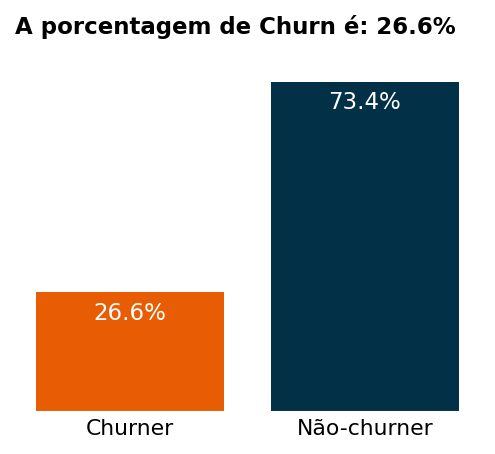

In [30]:
# Group the data by churn flag.
churn_grp = train.groupby(['Churn'])[['Churn']].count().rename(columns={'Churn': 'count'}).reset_index()
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['pct'])

# Define the plot.
fig, ax = plt.subplots(figsize=(4, 3))
        
# Plot the barplot.
bars = ax.bar(x=churn_grp['Churn'], height=churn_grp['pct'], color=['#e85d04', '#023047'])
        
# Customize the plot.
ax.set_title('A porcentagem de Churn é: 26.6%', fontweight='bold', fontsize=11, pad=15, loc='left')
ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['Não-churner', 'Churner'], fontsize=10.5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.invert_xaxis()
        
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format(height), 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),  
                textcoords="offset points",
                ha='center', va='center',
                fontsize=11, color='white')

A variável está desequilibrada. 26,6% dos clientes cancelaram seus planos. Assim, adotarei algumas estratégias para lidar com isso. Eles são:

- Stratified hold-out e validação cruzada k-fold para manter a proporção alvo em conjuntos de teste e validação, mesmo para ajuste de hiperparâmetros.
- Definir diferentes pesos de classe para instâncias de classes majoritárias e minoritárias. A ideia é definir pesos maiores para a classe minoritária, de forma que o modelo seja penalizado ao classificar erroneamente um cliente que abandona. Esses pesos são definidos no hiperparâmetro específico do modelo para ele.
- Dê uma olhada na compensação de recall de precisão, se necessário. O principal objetivo aqui é prever probabilidades de churn, não uma previsão binária. Isto permitirá ao banco tomar decisões mais informadas. Em vez de simplesmente avaliar se um cliente vai falhar ou não, pode verificar a probabilidade de ele pular o serviço.

### Variáveis Numéricas

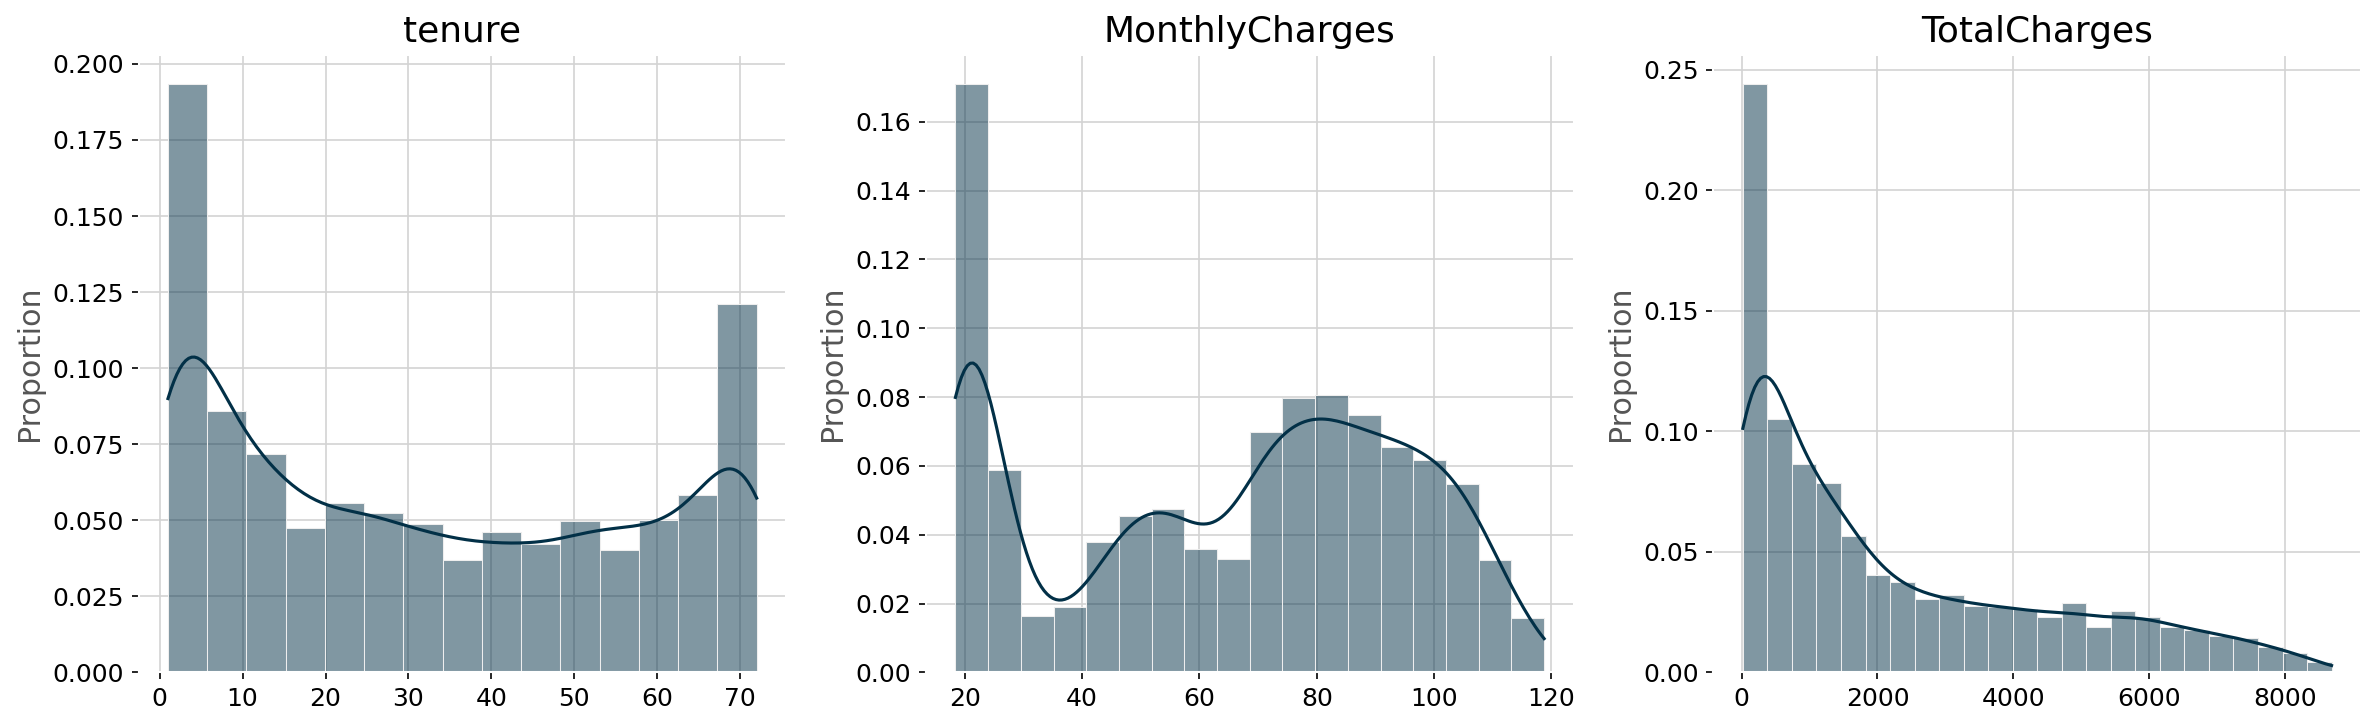

In [36]:
analysis_plots(data=train, features=numerical_features, kde=True, figsize=(16, 5))

Observações:
- A variável **tenure** apresenta dois picos. O primeiro representa que cerca de 19% são clientes novos e é a maior proporção da base. O outro pico são os clientes fies que representam cerca de 12%.
- A variável **MonthlyCharges** também apresenta dois picos. O primeiro mostra que cerca de 17% utilizam de serviços mais baratos. O segundo mostra que temos que gastam entre U$70 à U$100 por mês.
- A variável **TotalCharges** está distorcida à direita. Isto significa que a maioria dos clientes são novos e com poucos meses de utilização do serviço e temos poucos clientes com gastos mais elevados. Sendo necessário a empresa trabalhar para fidelizar mais os novos clientes, consequentemente, aumentando a receita da empresa.
- A maior proporção de clientes são novos.

**Coeficiente de Assimentria (Skewness)**<br>
Se os valores de uma *determinada variável independente* estiverem distorcidos (skew), dependendo do modelo, a assimetria pode violar as suposições do modelo (por exemplo, regressão logística) ou pode prejudicar a interpretação da importância da característica. Podemos determinar objetivamente se a variável está distorcida usando o teste de Shapiro-Wilks. Uma maneira mais conveniente de avaliar a assimetria é com o método “.skew” do pandas. Ele calcula o coeficiente de momento padronizado Fisher-Pearson para todas as colunas em um dataframe.

A Regra para assimetria parece ser:
-	Se a assimetria estiver entre -0,5 e 0,5, os dados são razoavelmente simétricos.
-	Se a assimetria estiver entre -1 e -0,5 (distorção negativa) ou entre 0,5 e 1 (distorção positiva), os dados serão moderadamente distorcidos.
-	Se a assimetria for menor que -1 (distorcida negativamente) ou maior que 1 (distorcida positivamente), os dados são altamente distorcidos.



Referencia: https://opendatascience.com/transforming-skewed-data-for-machine-learning/

In [39]:
print(train['tenure'].skew())
print(train['MonthlyCharges'].skew())
print(train['TotalCharges'].skew())

0.24147620427047517
-0.21993608469400452
0.9617257144797292


A variável **TotalCharges** está moderadamente distorcida, o que pode, dependendo do modelo prejudicar a interpretação.

### Outliers
Analisarei se há valores outliers e se eles representam informações inconsistentes, como erros de medição. Depois de fazer isso, decidirei se irei tratá-los ou não. Além disso, traçarei boxplots abaixo para fins de visualização.

In [37]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=numerical_features)

There are 0 outliers in the dataset.

Number (percentage) of outliers per feature: 

tenure: 0 (0.0)%
MonthlyCharges: 0 (0.0)%
TotalCharges: 0 (0.0)%


Não temos valores outliers

### Variáveis Categóricas

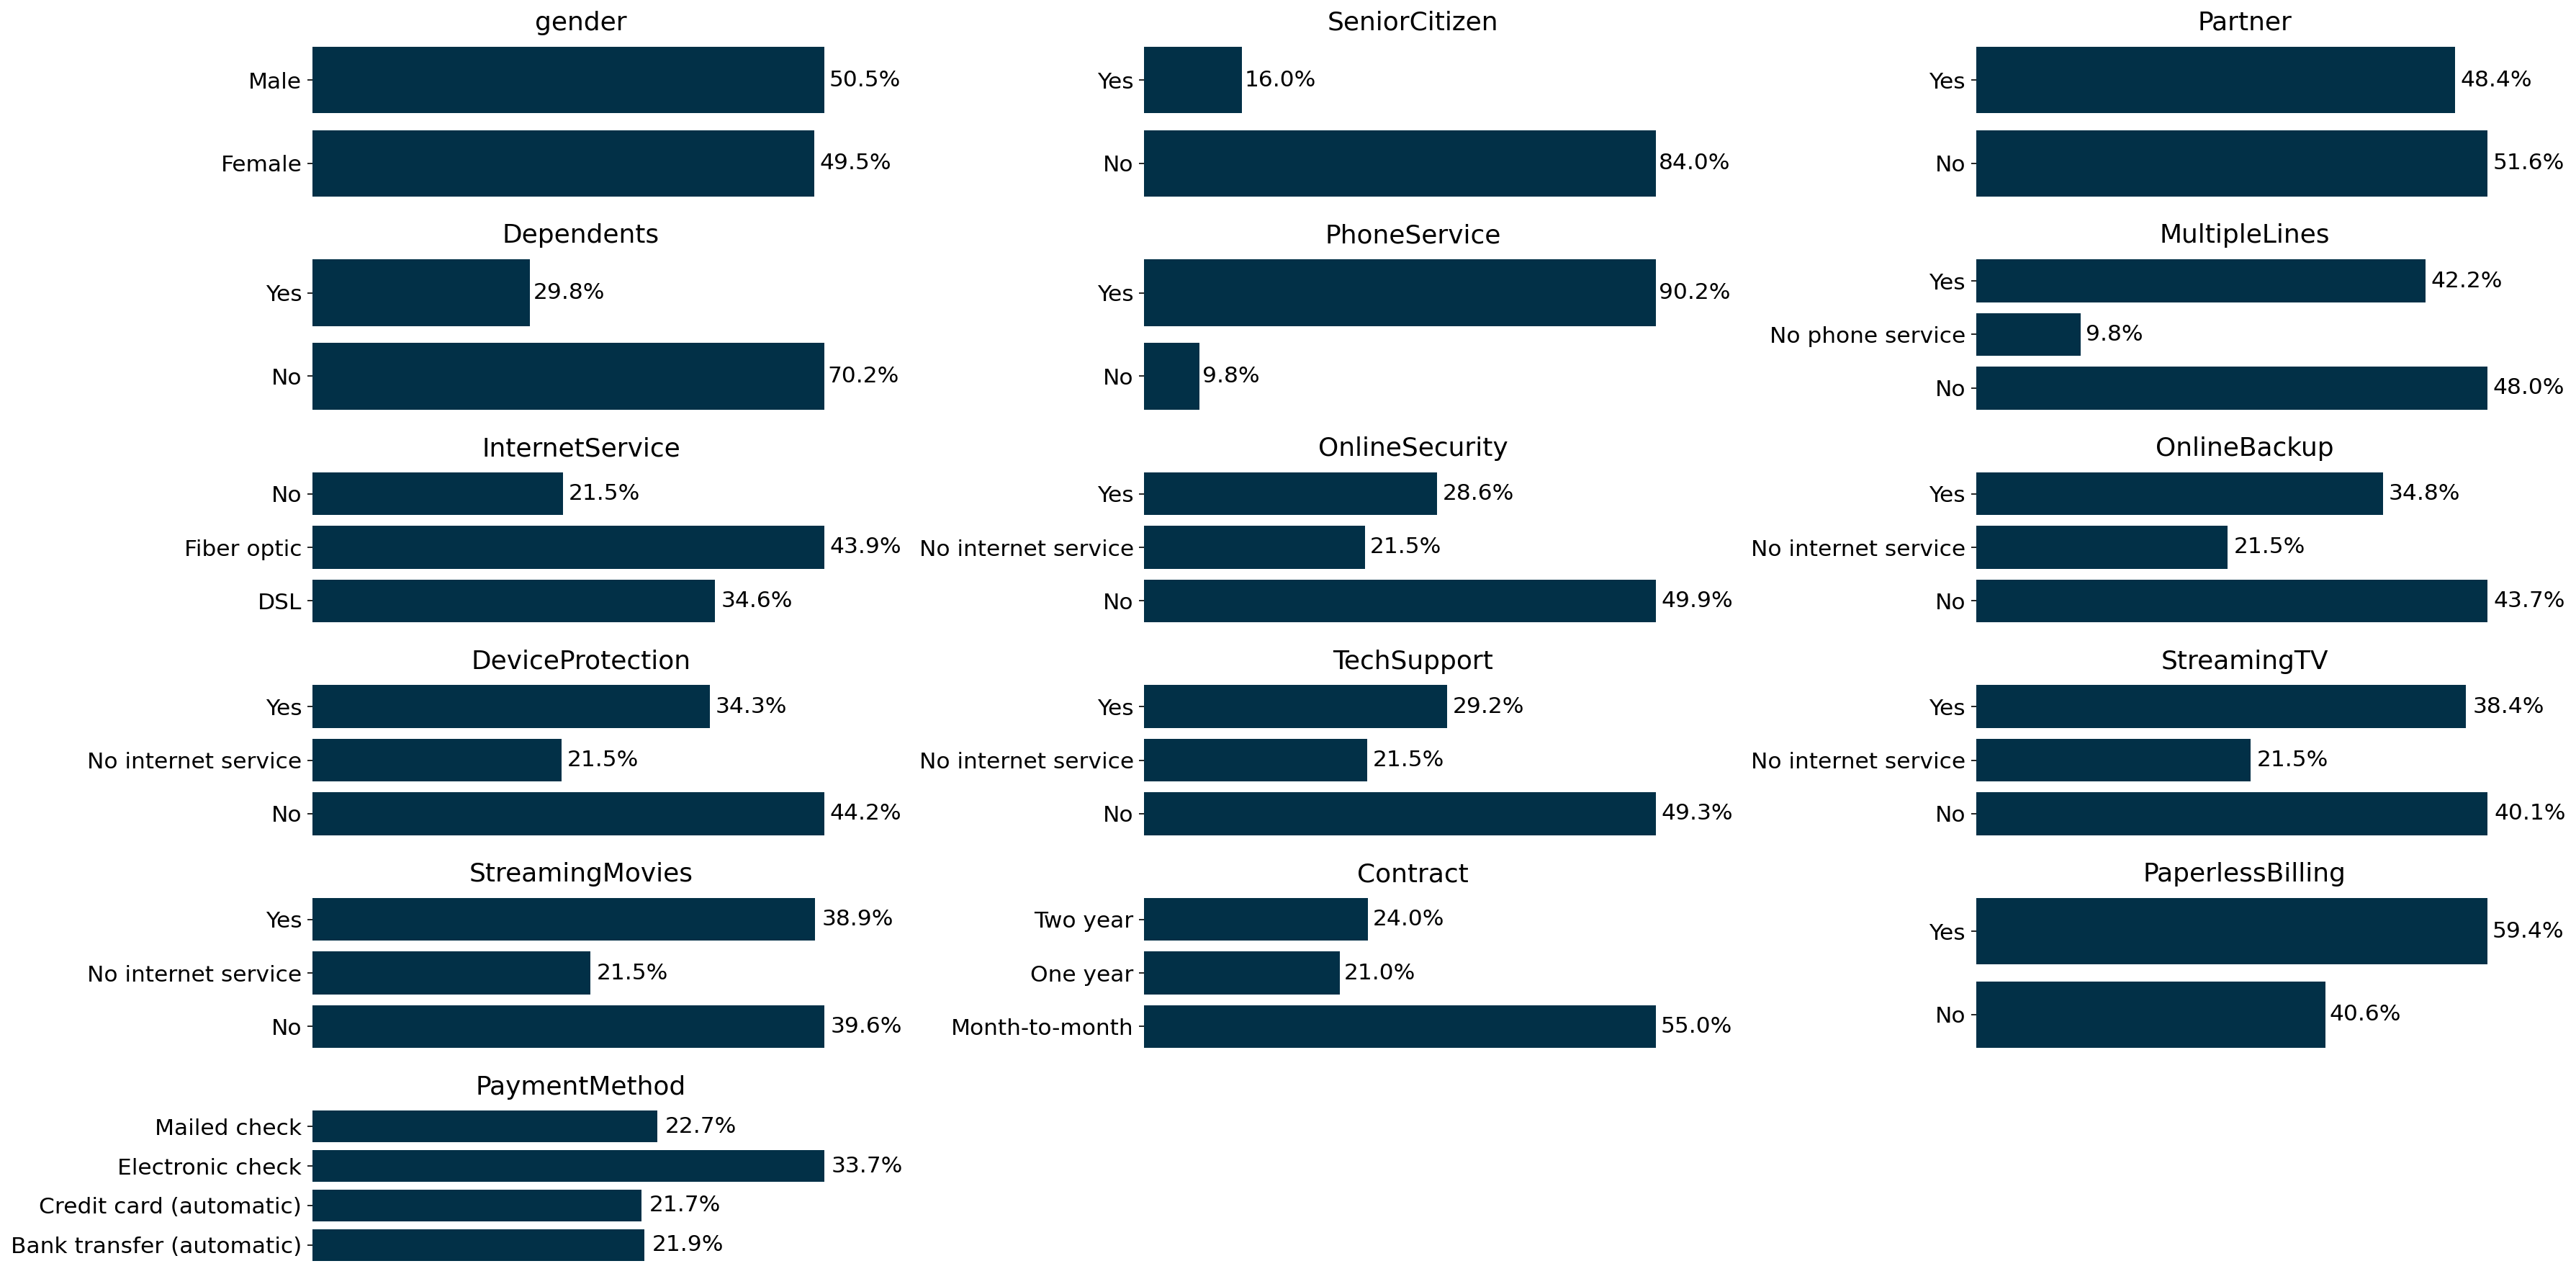

In [38]:
analysis_plots(data=train, features=categorical_features, barplot=True, figsize=(24, 12))

Observações:
- Temos apenas 16% de clientes idosos
- Temos 90% de clientes que utilizam um serviço de celular
- Temos aproximadamente 22% de clientes que não utilizam serviço de internet

### Análise bivariada e multivariada

### Correlation matrix

In [40]:
corr_matrix = train.corr(numeric_only=True)

In [41]:
corr_matrix['Churn'].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.192453
TotalCharges     -0.201883
tenure           -0.355193
Name: Churn, dtype: float64

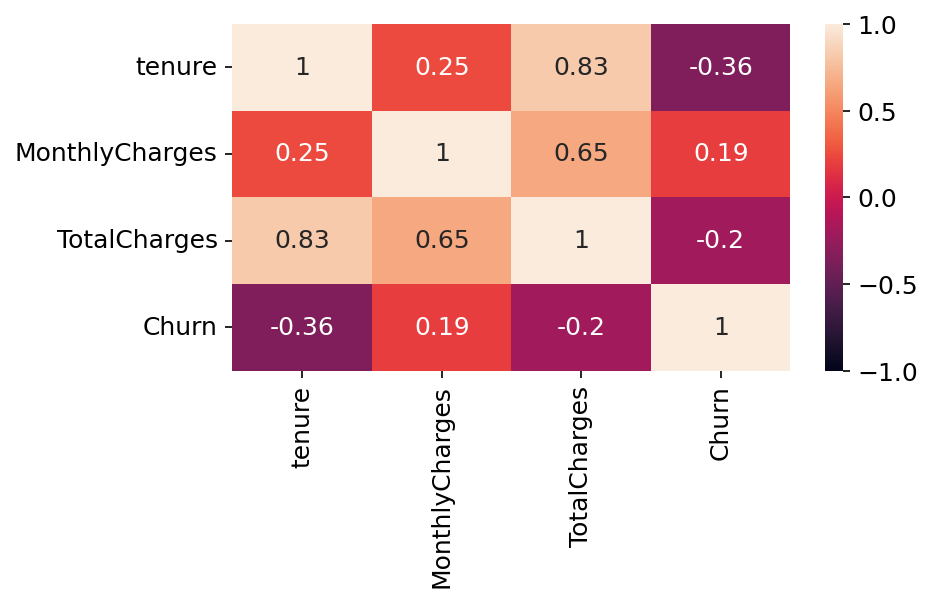

In [46]:
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

Observações:
- A variável **tenure** está altamente correlaciona com a variável **TotalCharges** o que faz todo o sentido, por que quanto maior o número de meses maior o gasto total.
- A variável **tenure** tem uma leve correlação negativa com a variável **Churn** e isso explica que os clientes estão cancelando seus planos logo no início do relacionamento, sendo que 55% dos contratos em vigência são month-to-month<br>

Segue a comprovação do insight abaixo.

In [58]:
# clientes com mais de 35 meses do contrato
train[train['tenure'] > 35]['Churn'].value_counts(normalize=True) * 100

Churn
0    87.919708
1    12.080292
Name: proportion, dtype: float64

In [71]:
# clientes com menos ou 10 meses de contrato
train[train['tenure'] <= 10]['Churn'].value_counts(normalize=True) * 100

Churn
0    50.424448
1    49.575552
Name: proportion, dtype: float64

In [69]:
# clientes com menos ou 9 meses de contrato
train[train['tenure'] <= 9]['Churn'].value_counts(normalize=True) * 100

Churn
1    50.361011
0    49.638989
Name: proportion, dtype: float64

Até o 9 mes de relacionamento tem mais cancelamentos do que retenção de clientes.

### Variáveis Numéricas por Churn

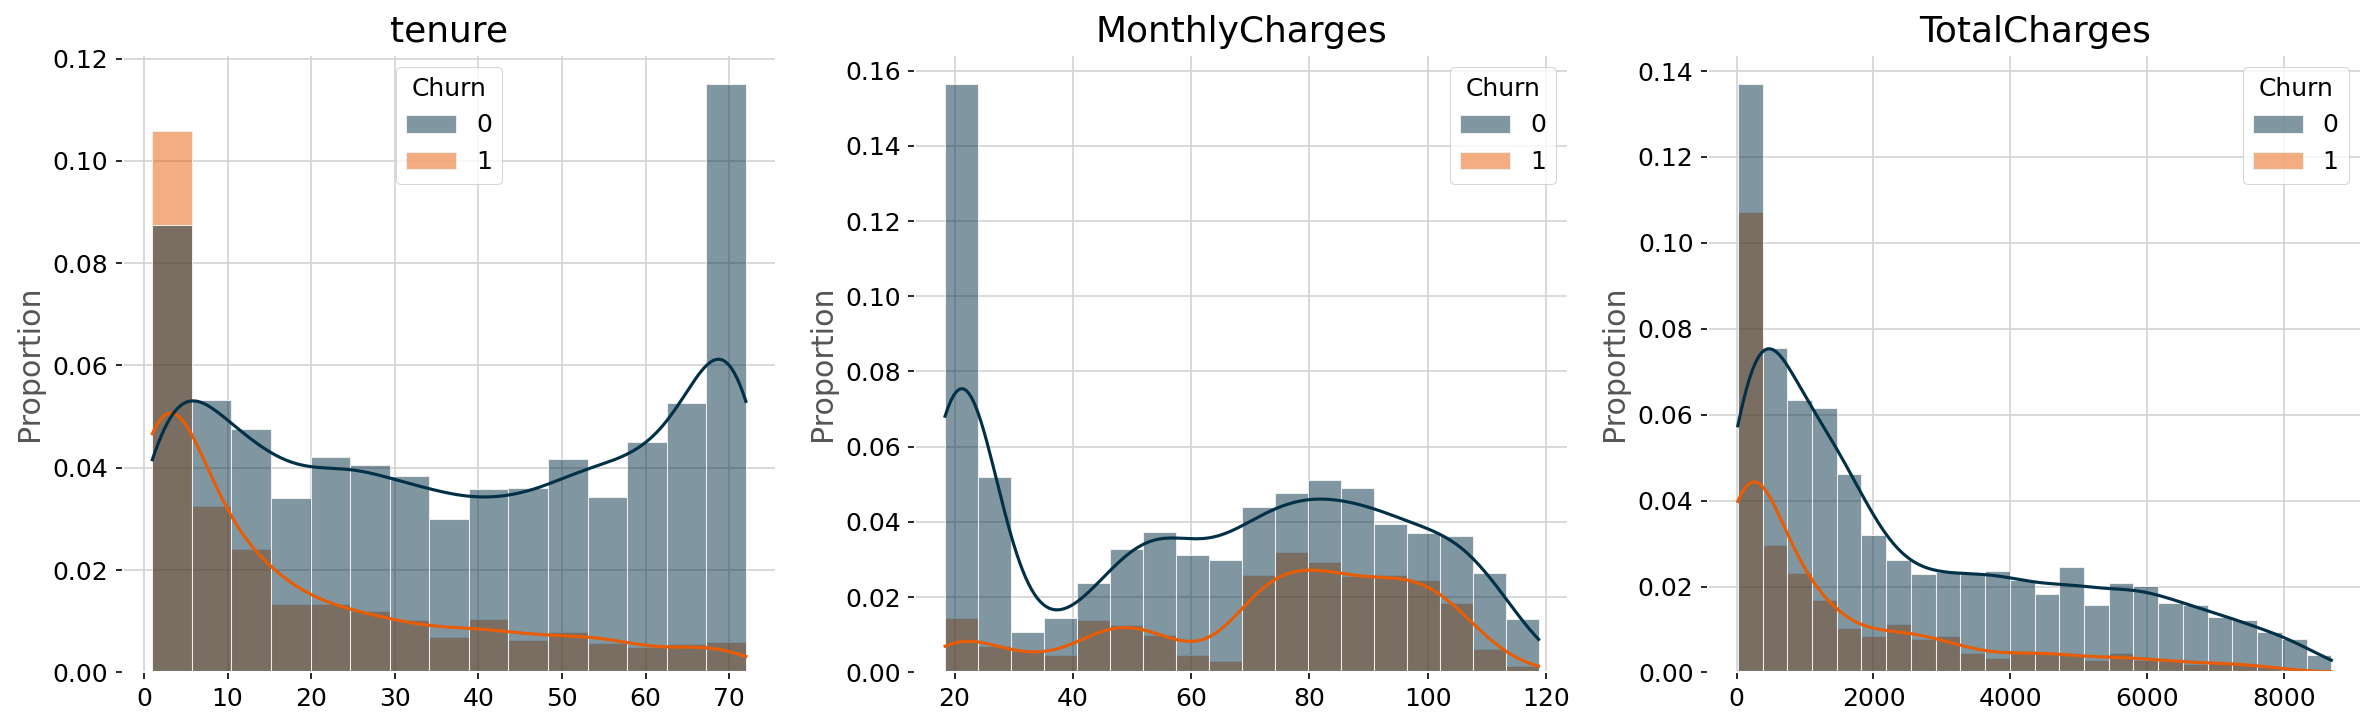

In [73]:
analysis_plots(data=train, features=numerical_features, histplot=True, kde=True, hue=target, figsize=(16, 5))

### Variáveis Categóricas por Churn

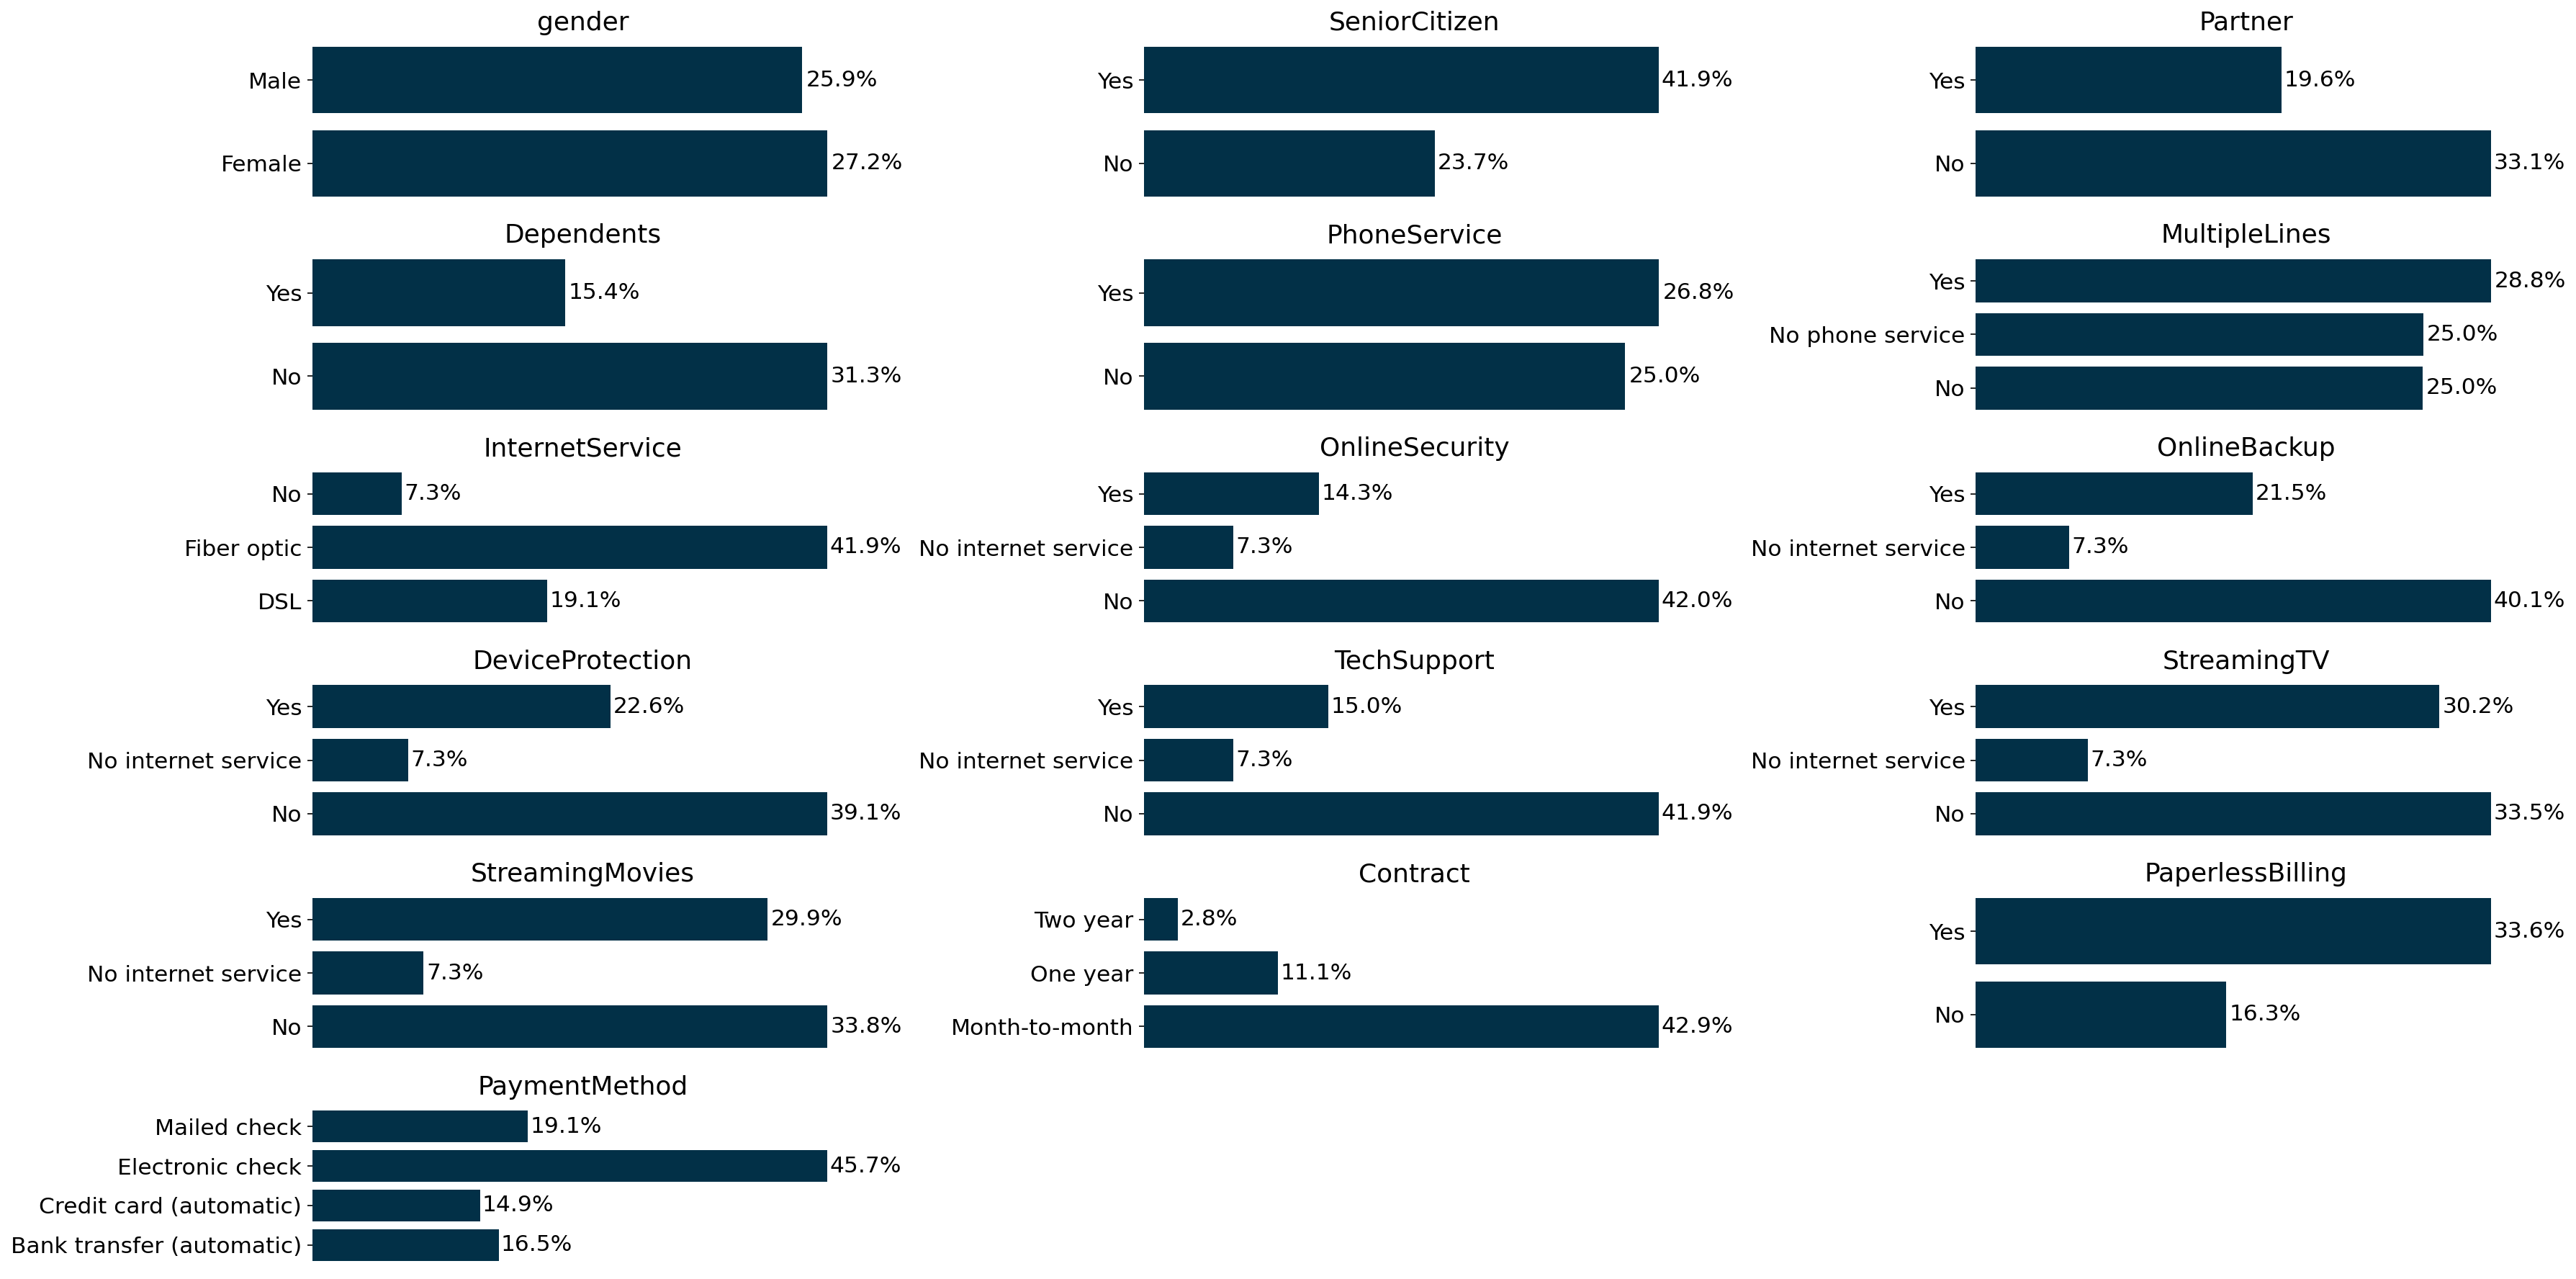

In [74]:
analysis_plots(data=train, features=categorical_features, barplot=True, figsize=(24, 12), hue=target, text_y=0.2)

Observações:
- Dos 16% de clientes idosos, 41% cancelam seus planos.
- Temos 90% de clientes que utilizam o plano de celular e desses apenas 27% cancelam o plano.
- Os clientes que não possuem um plano de internet tem uma baixa porcentagem de Churn.
- Dos 42% de clientes que possuem Fibra Optica aproximadamente 44% cancelam o plano. O que representa quase 2/3.
- Com relação aos produtos de Streaming a maioria não cancela por esse motivo.

Insight
- O problema da empresa esta nos planos de INTERNET, o serviço de Fibra Optica tem aproximadamente 50% de Churn.

### Conclusão da Análise Exploratória

**Principais insights:**
- A maioria dos clientes da base são clientes novos e apresentam uma alta taxa de churn até o 10 mes.
- Cerca de 20% dos clientes estão com planos mais economicos.
- Aproximadamente 22% de cliente não utilizam serviço de Internet.
- Dos 16% de clientes idosos, 41% cancelam seus planos.
- Temos 90% de clientes que utilizam o plano de celular e desses apenas 27% cancelam o plano.
- Dos 42% de clientes que possuem Fibra Optica aproximadamente 44% cancelam o plano. O que representa quase 2/3.
- Com relação aos produtos de Streaming a maioria não cancela por esse motivo.

**Ponto positivo:** Serviço de Celular, baixa taxa de cancelamento<br>
**Ponto negativo:** Serviço de Internet, pela falta de cliente e pela alta taxa de cancelamento.